In [96]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [97]:
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

In [98]:
file_path = "Data/firestore_ai_training_data_20250324_173442.csv"
game_data = pd.read_csv(file_path) #data as .csv file?


game_data['newDifficulty'] = game_data['newDifficulty'] - game_data['currentDifficulty']

In [99]:
game_data

,currentDifficulty,currentPlayerLives,id,levelsBeat,newDifficulty,playerLifeTimer,totalEnemiesKilled,totalPoints
0,2,0,0EbSXFZTryuq8oIfT5XD,2,0,29.496090,4,500
1,2,3,0MHiDsJMOXccolv2iGBX,2,0,20.071680,3,500
2,1,3,0fNyt4XAYVfxmrqhzHiS,2,0,21.088810,3,300
3,9,0,166Ds8AdrIlJM4pJwq2l,2,1,12.886800,0,0
4,1,2,1FQeoJPdbjvdXsvMIHHX,3,0,29.910000,4,400
...,...,...,...,...,...,...,...,...
453,8,2,zjKGbmNvnMzEw0dGT1TZ,7,1,49.470540,5,46400
454,1,3,zkDzIKcMEvhhYJkCtJy4,1,1,8.352791,1,100
455,1,0,zsZZHTI3xXZhscaJ39cC,1,0,43.373280,1,100
456,4,0,ztMqf7s3RfKt9f9j7zPK,2,1,45.579180,1,800


## Data Preprocesing

([<matplotlib.patches.Wedge at 0x1bd87930da0>,
 [Text(0.4122226825762108, 1.0198394285227812, '0'),
  Text(-0.9224006513933636, 0.5993138062059798, '-1'),
  Text(-0.20997220036499176, -1.0797738999780853, '1')])

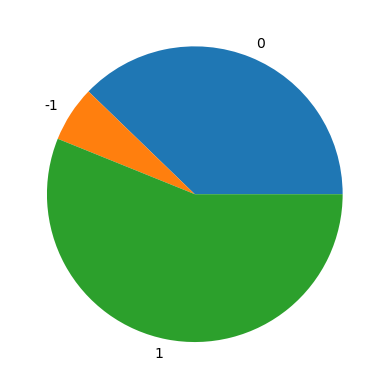

In [100]:
import matplotlib.pyplot as plt
same_difficulty_data = game_data[game_data.newDifficulty.eq(0)]
lower_difficulty_data = game_data[game_data.newDifficulty.eq(-1)]
increase_difficulty_data = game_data[game_data.newDifficulty.eq(1)]

fig, ax = plt.subplots()
ax.pie([len(same_difficulty_data), len(lower_difficulty_data), len(increase_difficulty_data)], labels=['0', '-1', '1'])

In [101]:
game_data.columns

Index(['currentDifficulty', 'currentPlayerLives', 'id', 'levelsBeat',
       'newDifficulty', 'playerLifeTimer', 'totalEnemiesKilled',
       'totalPoints'],
      dtype='object')

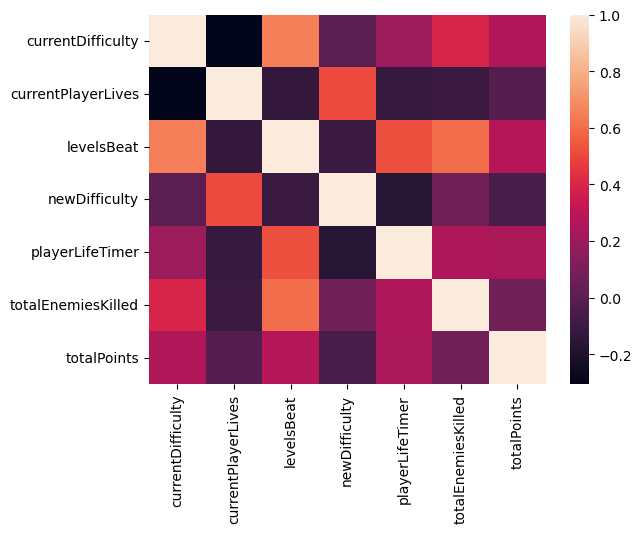

In [102]:
import seaborn as sb

columns_drop_name = ['id']

game_data_copy = game_data.drop(columns_drop_name, axis='columns')

heatmap = sb.heatmap(game_data_copy.corr())

In [103]:
column_drop_name = 'newDifficulty'
#columns_drop_name = ['newDifficulty', 'id', 'totalPoints', 'playerLifeTimer']
columns_drop_name = ['newDifficulty', 'id']

x = game_data.drop(columns_drop_name, axis='columns')

y = pd.DataFrame()
y['Result'] = game_data[column_drop_name]

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 101)
x, y = smote.fit_resample(x, y)

([<matplotlib.patches.Wedge at 0x1bd87a0ae70>,
 [Text(0.5499999702695115, 0.9526279613277875, '0'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '-1'),
  Text(0.5500001486524352, -0.9526278583383436, '1')])

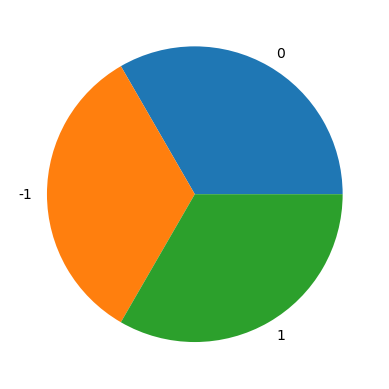

In [104]:
same_difficulty_data = y[y.Result.eq(0)]
lower_difficulty_data = y[y.Result.eq(-1)]
increase_difficulty_data = y[y.Result.eq(1)]

fig, ax = plt.subplots()
ax.pie([len(same_difficulty_data), len(lower_difficulty_data), len(increase_difficulty_data)], labels=['0', '-1', '1'])

In [105]:
#split data into training and testing data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [106]:
X_train

,currentDifficulty,currentPlayerLives,levelsBeat,playerLifeTimer,totalEnemiesKilled,totalPoints
604,4,0,4,48.528282,1,1116
623,5,0,2,29.225535,3,3371
281,1,3,1,14.486930,1,100
432,3,0,2,6.986797,3,500
180,1,2,6,86.053240,14,1375
...,...,...,...,...,...,...
162,6,2,6,73.120330,2,5600
101,2,3,2,18.255080,3,500
64,5,2,5,16.653380,15,11700
43,7,3,6,92.050090,2,11200


In [107]:
y_train

,Result
604,-1
623,-1
281,1
432,-1
180,0
...,...
162,1
101,0
64,1
43,1


In [108]:
X_test

,currentDifficulty,currentPlayerLives,levelsBeat,playerLifeTimer,totalEnemiesKilled,totalPoints
66,3,2,3,20.136780,7,2100
117,4,1,6,44.633840,2,1400
708,5,1,7,16.214982,11,5647
263,7,1,5,23.762680,12,44800
457,3,0,2,9.787905,4,900
...,...,...,...,...,...,...
466,4,0,4,8.920531,10,4656
592,2,0,1,26.854114,1,249
510,4,0,2,15.536192,7,2942
65,1,3,3,19.372790,4,400


In [109]:
y_test

,Result
66,1
117,0
708,0
263,1
457,1
...,...
466,-1
592,-1
510,-1
65,0


## AI Model Training

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train['Result'])

DecisionTreeClassifier()

## Testing Model Accuracy + Other Metrics

In [111]:
X_test

,currentDifficulty,currentPlayerLives,levelsBeat,playerLifeTimer,totalEnemiesKilled,totalPoints
66,3,2,3,20.136780,7,2100
117,4,1,6,44.633840,2,1400
708,5,1,7,16.214982,11,5647
263,7,1,5,23.762680,12,44800
457,3,0,2,9.787905,4,900
...,...,...,...,...,...,...
466,4,0,4,8.920531,10,4656
592,2,0,1,26.854114,1,249
510,4,0,2,15.536192,7,2942
65,1,3,3,19.372790,4,400


In [112]:
y_predict = dt.predict(X_test)

In [113]:
y_predict

array([ 1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1,
        1, -1, -1, -1,  1, -1,  0,  1,  0, -1,  1,  1, -1, -1,  0,  0,  1,
        1,  1,  0, -1, -1,  0,  0,  1,  0,  0, -1,  1,  1,  0, -1, -1,  0,
        0,  0, -1,  0,  1,  1, -1,  0,  1, -1, -1,  1,  0, -1,  0, -1,  0,
        1,  0, -1,  0,  0, -1, -1,  1,  0,  1,  0,  0,  0,  1,  1, -1,  0,
        0,  1,  0,  0,  1, -1, -1, -1,  1, -1, -1, -1, -1,  0,  1, -1,  0,
       -1,  0,  1,  0,  1,  0,  1, -1,  0,  1,  1, -1, -1,  1,  1,  0,  1,
        0, -1,  1, -1,  0,  0,  1, -1,  1, -1,  1,  1, -1,  1,  1,  0,  1,
        0,  0,  1, -1,  0,  0, -1, -1,  0,  1, -1,  0,  1, -1, -1, -1, -1,
        0, -1], dtype=int64)

In [114]:
sklearn.metrics.accuracy_score(y_test, y_predict)

0.8129032258064516

In [115]:
sklearn.metrics.precision_recall_fscore_support(y_test, y_predict) #might need to add average = 'macro'

(array([0.83333333, 0.81818182, 0.7826087 ]),
 array([0.97826087, 0.76271186, 0.72      ]),
 array([0.9       , 0.78947368, 0.75      ]),
 array([46, 59, 50], dtype=int64))

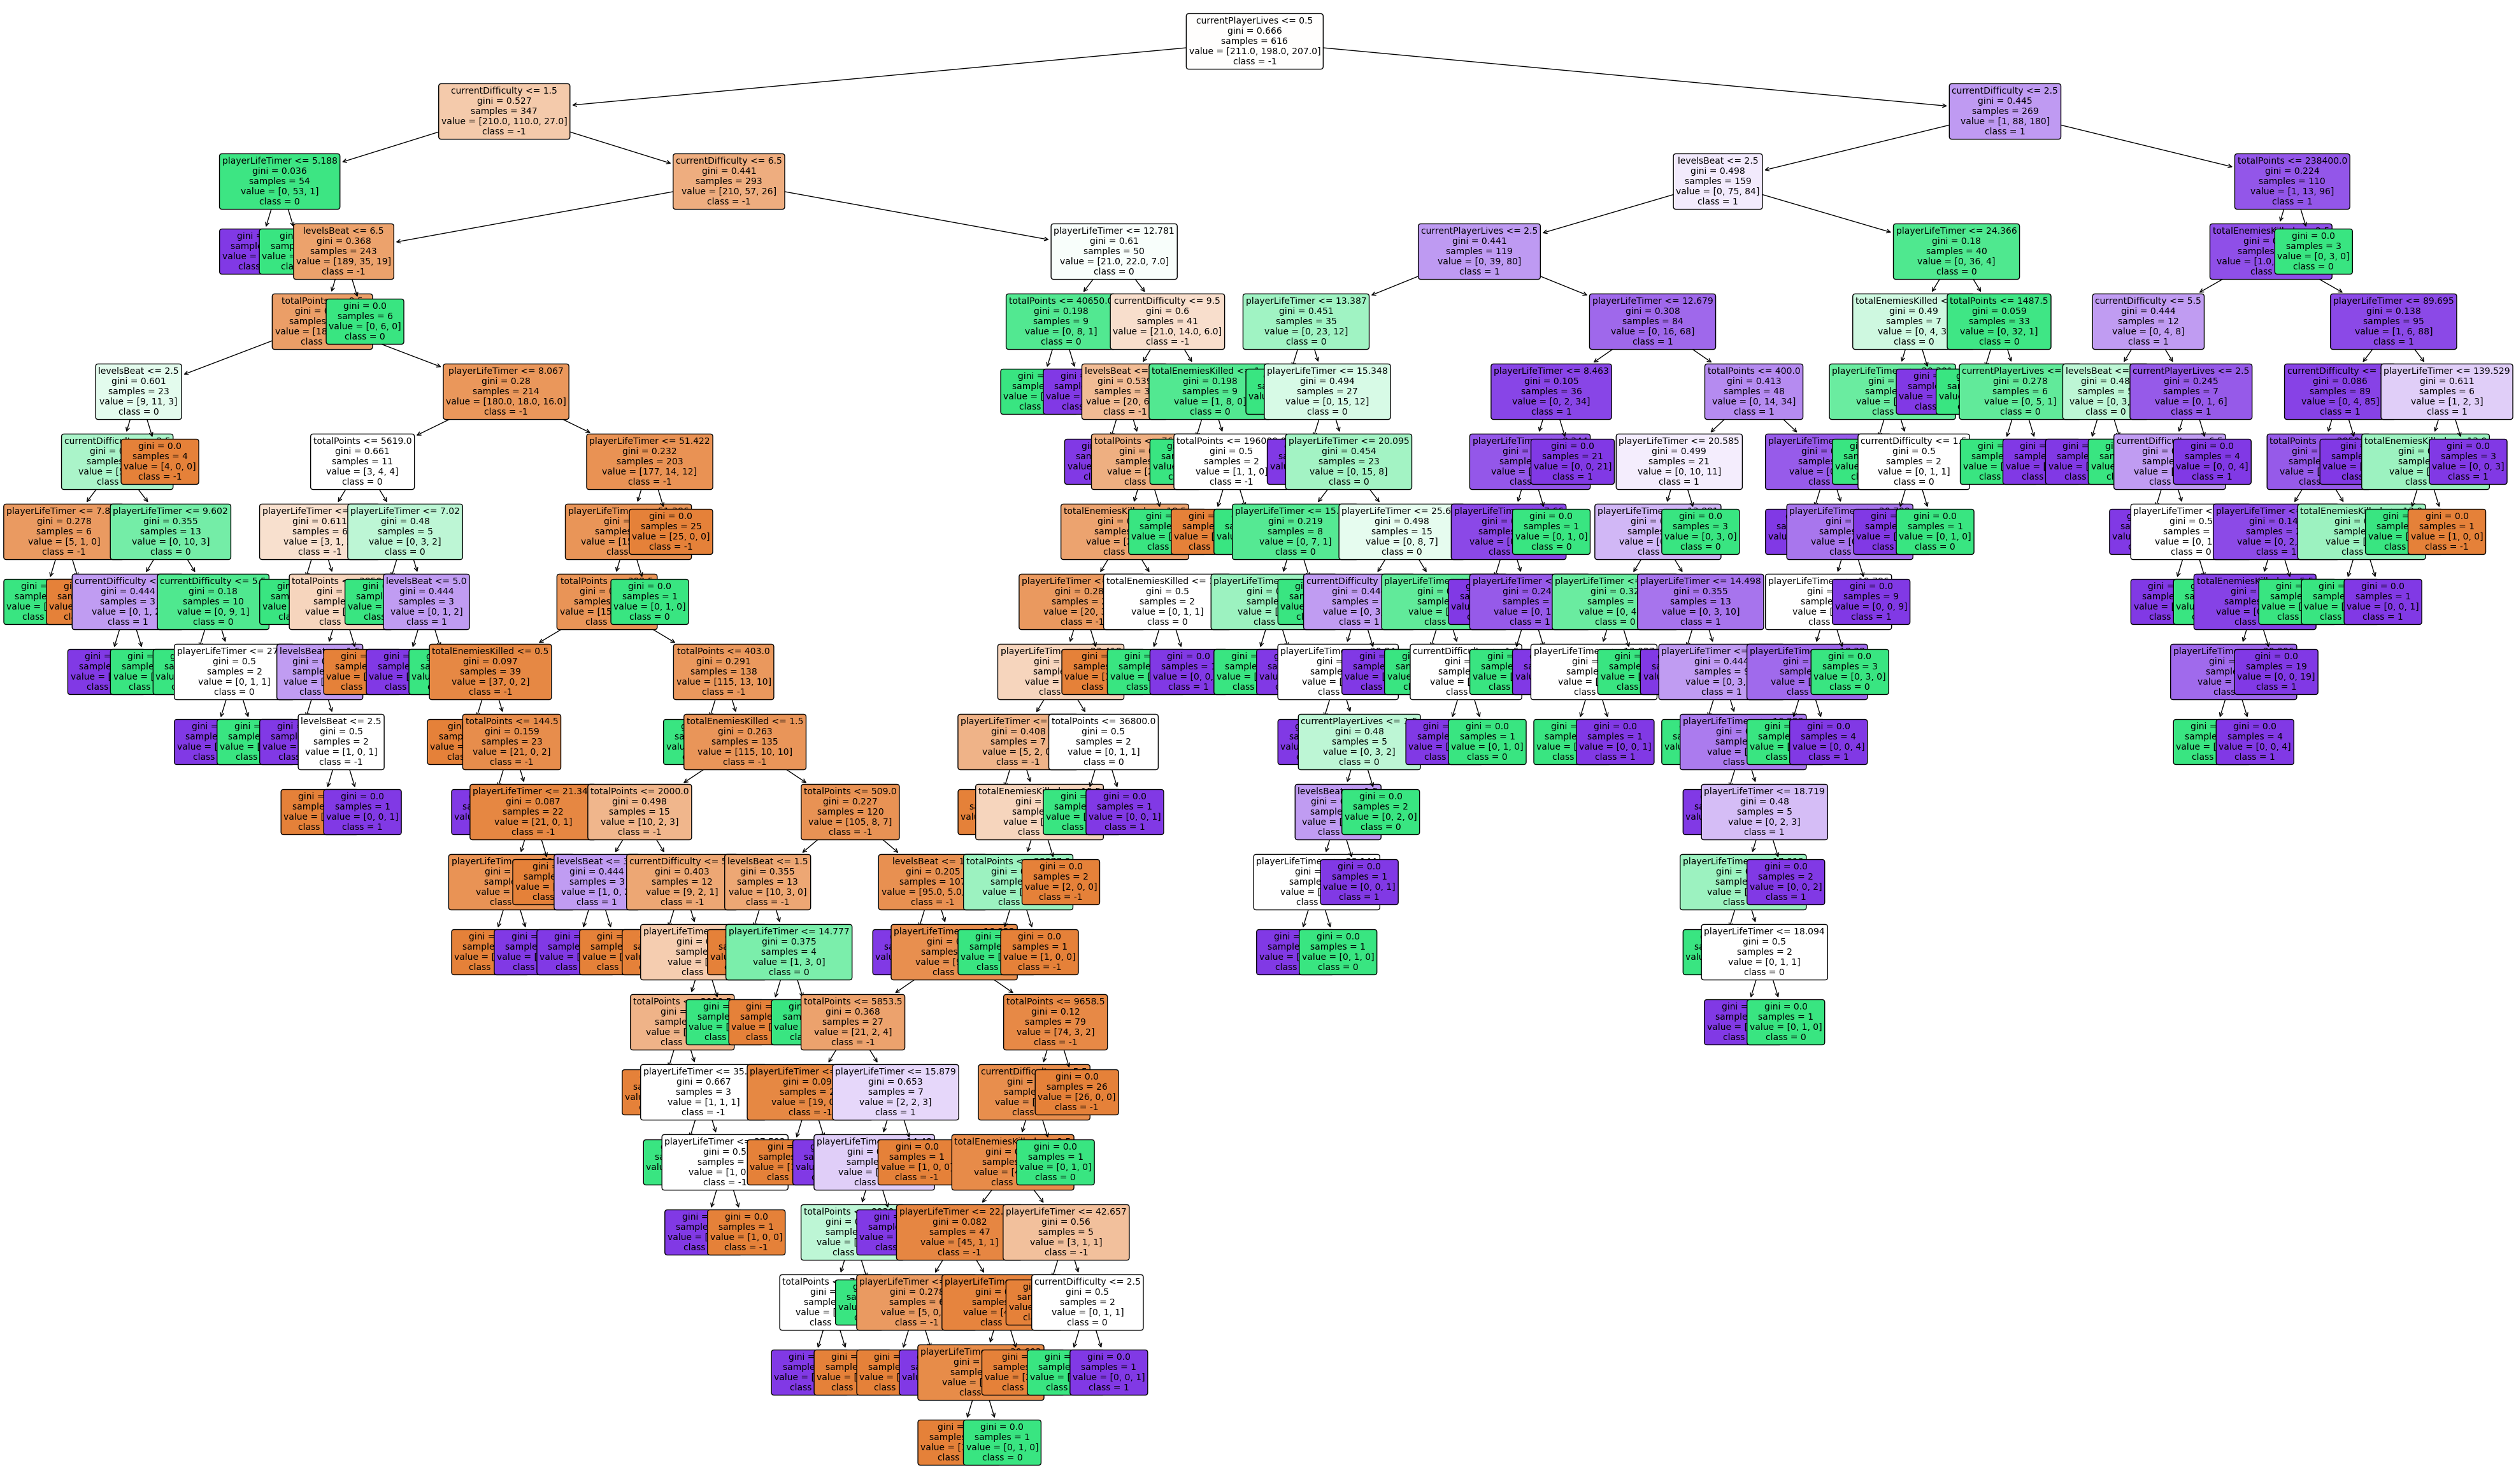

In [140]:
from sklearn.tree import plot_tree

#[]
#[-1, 0, 1]

plt.figure(figsize=(50, 30)) # Resize figure
feature_names = ['currentDifficulty', 'currentPlayerLives', 'levelsBeat', 'playerLifeTimer', 'totalEnemiesKilled', 'totalPoints']
class_names = ['-1', '0', '1']
plot_tree(decision_tree=dt, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=10)
plt.show()

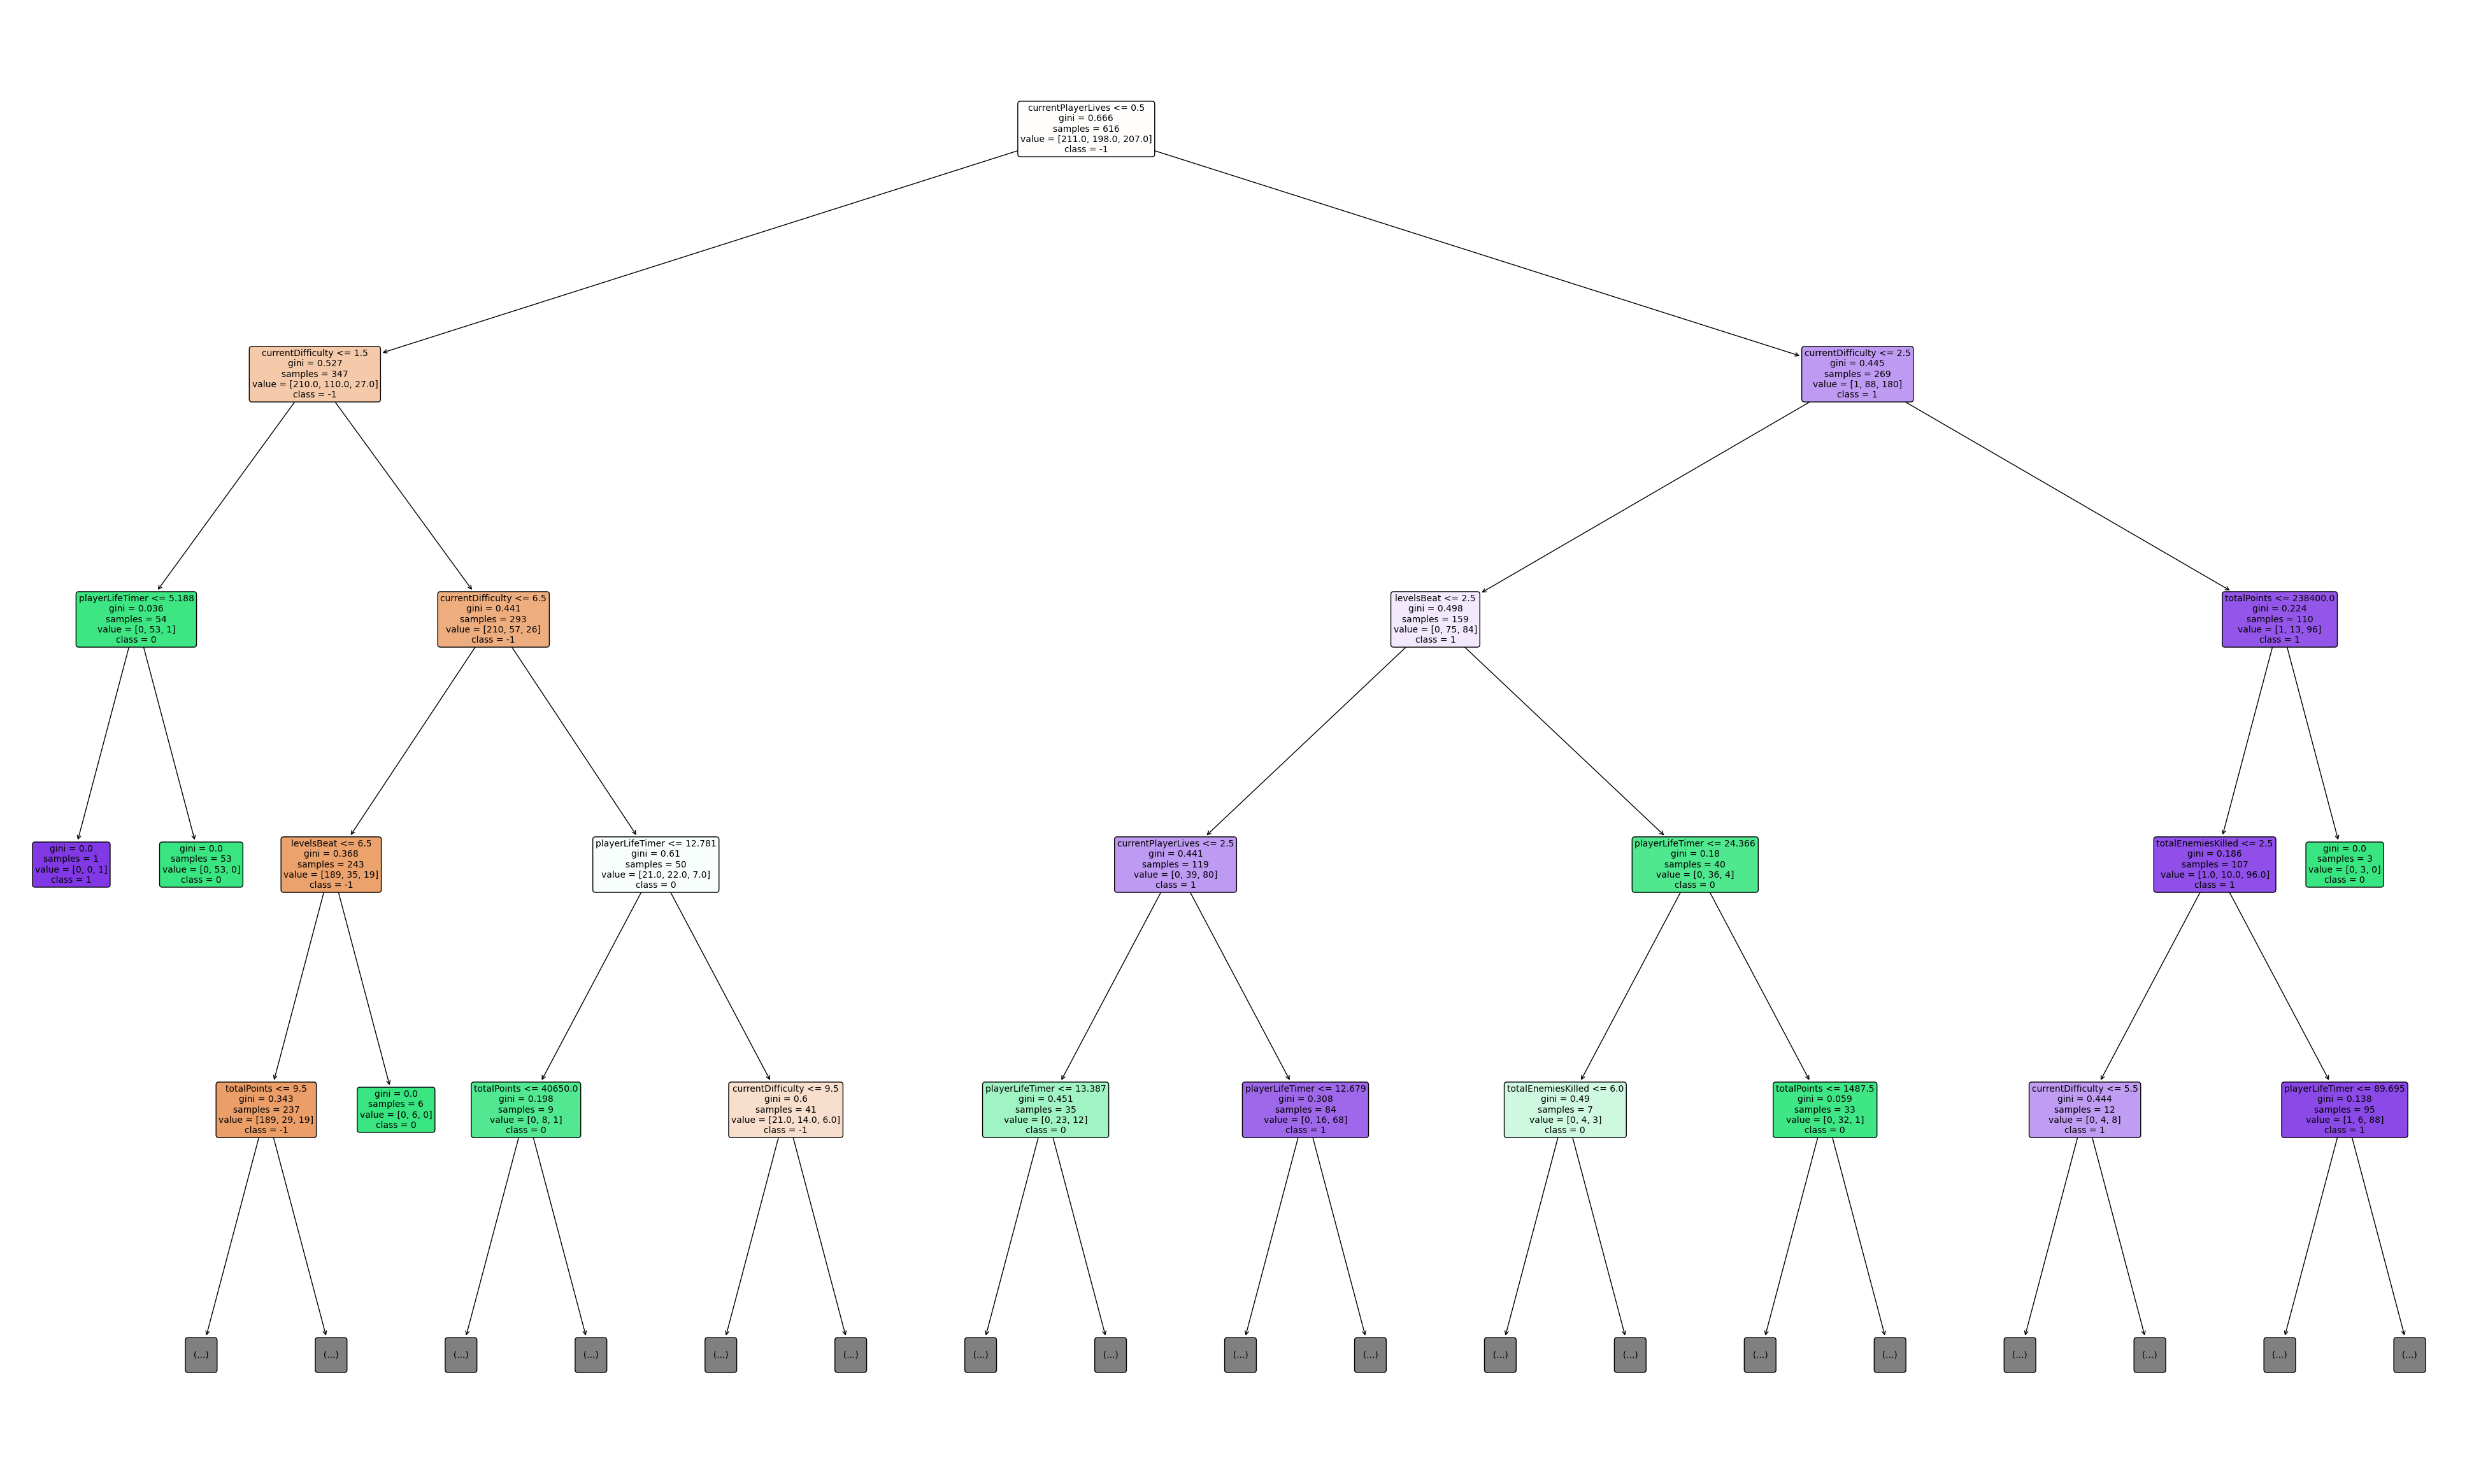

In [142]:
plt.figure(figsize=(50, 30)) # Resize figure
feature_names = ['currentDifficulty', 'currentPlayerLives', 'levelsBeat', 'playerLifeTimer', 'totalEnemiesKilled', 'totalPoints']
class_names = ['-1', '0', '1']
plot_tree(decision_tree=dt, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.show()

## Saving Model Weights

In [116]:
from joblib import dump, load

save = input("Save Model Weights? (y/n)")

if save == "y":
    file_name = input("Enter File Name")
    dump(dt, file_name + '.joblib')
    dt = load(file_name + '.joblib')